#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 20 de outubro. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_20out2020.csv'
df = pd.read_csv(filename, delimiter=';',
                 error_bad_lines=False)

In [3]:
df.shape

(1169620, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169620 entries, 0 to 1169619
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1169620 non-null  object 
 1   estado                  1169381 non-null  object 
 2   municipio               1158560 non-null  object 
 3   coduf                   1169620 non-null  int64  
 4   codmun                  1162928 non-null  float64
 5   codRegiaoSaude          1158560 non-null  float64
 6   nomeRegiaoSaude         1158560 non-null  object 
 7   data                    1169620 non-null  object 
 8   semanaEpi               1169620 non-null  int64  
 9   populacaoTCU2019        1165252 non-null  float64
 10  casosAcumulado          1169620 non-null  int64  
 11  casosNovos              1169620 non-null  int64  
 12  obitosAcumulado         1169620 non-null  int64  
 13  obitosNovos             1169620 non-null  int64  
 14  Re

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
712401,Sudeste,SP,Campo Limpo Paulista,35,350960.0,35073.0,JUNDIAI,2020-09-16,38,84650.0,1158,73,65,0,NaN,NaN,0.0
903718,Sul,PR,Tupãssi,41,412795.0,41020.0,20ª RS TOLEDO,2020-08-04,32,8124.0,59,0,1,0,NaN,NaN,0.0
915017,Sul,SC,Bocaina do Sul,42,420243.0,42013.0,SERRA CATARINENSE,2020-10-10,41,3474.0,28,0,2,0,NaN,NaN,0.0
572441,Sudeste,MG,Mário Campos,31,314015.0,31017.0,BETIM,2020-10-10,41,15416.0,138,0,9,0,NaN,NaN,1.0
776475,Sudeste,SP,Pedreira,35,353710.0,35072.0,REGIAO METROPOLITANA DE CAMPINAS,2020-09-26,39,47919.0,541,-1,7,0,NaN,NaN,1.0
1110894,Centro-Oeste,MT,Santa Carmem,51,510724.0,51014.0,TELES PIRES,2020-08-12,33,4525.0,81,2,1,0,NaN,NaN,0.0
465286,Nordeste,BA,Saubara,29,292975.0,29020.0,SALVADOR,2020-09-05,36,12043.0,60,0,6,0,NaN,NaN,0.0
33695,Norte,AM,Silves,13,130400.0,13004.0,MEDIO AMAZONAS,2020-09-14,38,9171.0,352,0,5,0,NaN,NaN,1.0
1014804,Sul,RS,Jaguarão,43,431100.0,43021.0,REGIAO 21,2020-08-18,34,26680.0,60,0,3,0,NaN,NaN,0.0
478718,Sudeste,MG,Alagoa,31,310130.0,31008.0,SAO LOURENCO,2020-06-09,24,2674.0,0,0,0,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    38246
RJ    19836
CE     9218
PE     8505
MG     8483
BA     7363
PA     6686
RS     5452
GO     5444
PR     4999
AM     4363
MA     3949
ES     3740
MT     3690
DF     3575
PB     3010
SC     2991
RN     2553
PI     2304
AL     2187
SE     2145
MS     1512
RO     1429
TO     1055
AP      734
RR      686
AC      682
Name: obitosAcumulado, dtype: int64

<AxesSubplot:ylabel='estado'>

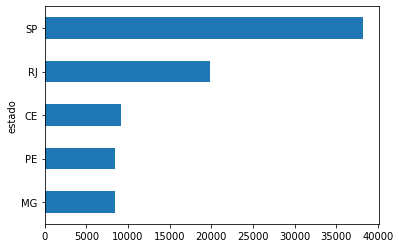

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

<AxesSubplot:xlabel='data'>

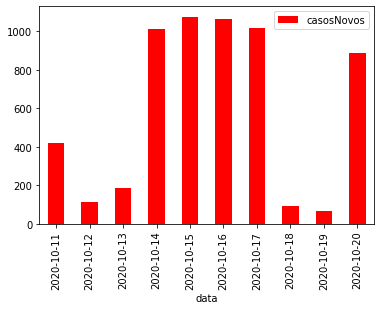

In [8]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

<AxesSubplot:xlabel='semanaEpi'>

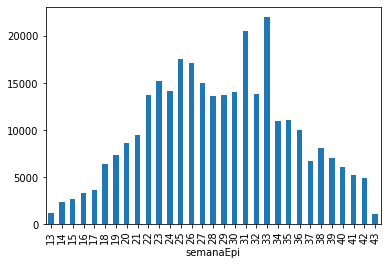

In [9]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

<AxesSubplot:xlabel='data'>

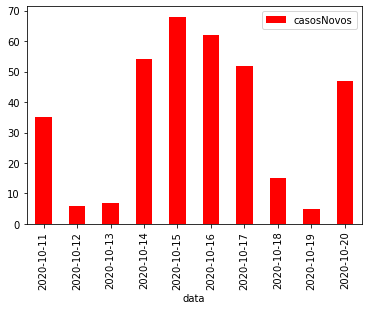

In [10]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

<AxesSubplot:xlabel='semanaEpi'>

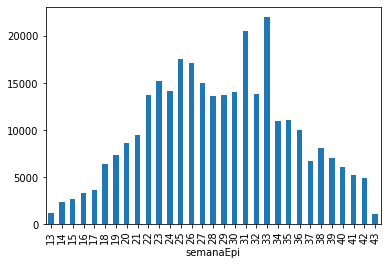

In [11]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')